In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [25]:
path="/content/drive/MyDrive/dataset/Data.csv"
data = pd.read_csv(path)

# Basic info
print(data.head(10))
print(data.shape)
print(data.tail(3))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv


✅ Accuracy Score: 0.8205 (82.05%)

📊 Classification Report:
              precision    recall  f1-score   support

       <=50K       0.95      0.81      0.87      7479
        >50K       0.58      0.86      0.69      2290

    accuracy                           0.82      9769
   macro avg       0.76      0.83      0.78      9769
weighted avg       0.86      0.82      0.83      9769



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


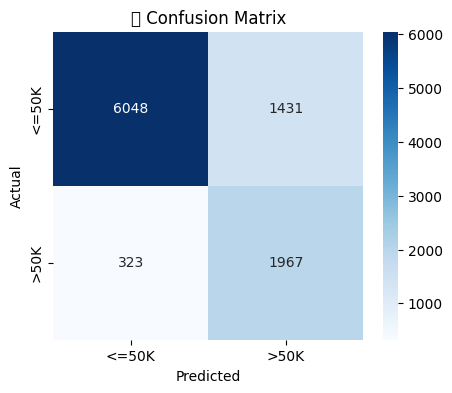

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


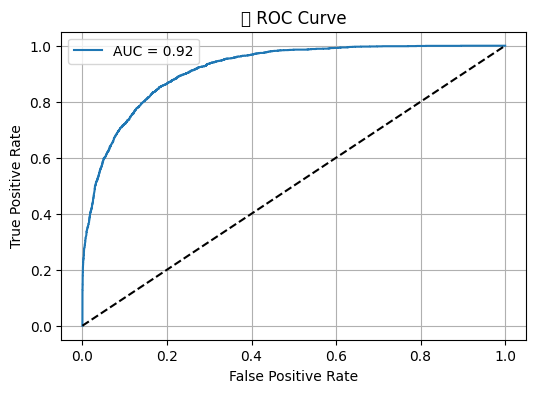

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


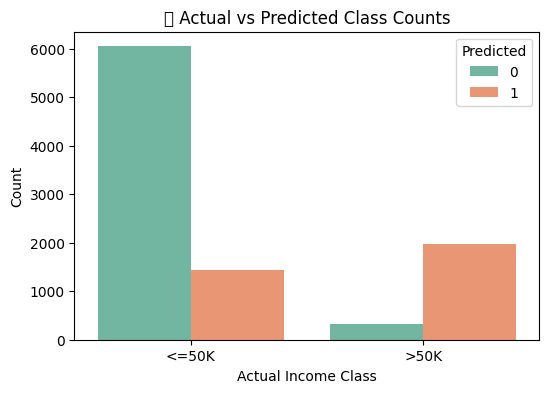

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


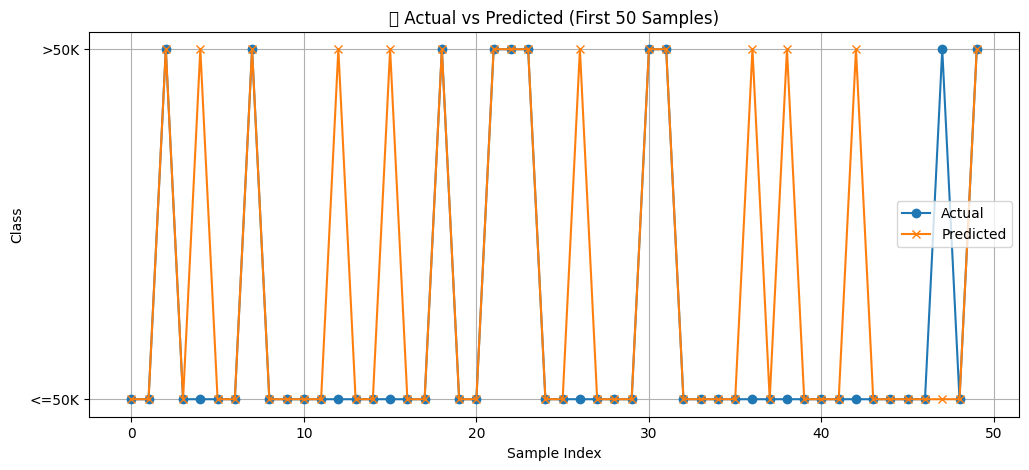

In [26]:

# 🧠 Encode gender
data = data[data['gender'].isin(['Male', 'Female'])]
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

# 🎯 Encode target
data['income_class'] = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# 🔍 Feature columns
categorical_cols = ['education', 'occupation', 'workclass', 'marital-status']
numerical_cols = ['age', 'hours-per-week', 'capital-gain', 'capital-loss', 'gender']

# ✅ One-hot encode categorical features
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# ✅ Final feature matrix
X = data[numerical_cols + [col for col in data.columns if any(cat in col for cat in categorical_cols)]]
y = data['income_class']

# 🧪 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚖️ Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📈 Handle imbalance using SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

# 🌲 Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# 💾 Save model and scaler
joblib.dump(model, 'salary_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# 🔮 Predict
y_pred = model.predict(X_test_scaled)

# ✅ Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {acc:.4f} ({acc * 100:.2f}%)")

# 📊 Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

# 🧩 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("🧩 Confusion Matrix")
plt.show()

# 📉 ROC Curve & AUC
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# 🔢 Actual vs Predicted Bar
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_counts = comparison_df.value_counts().reset_index(name='Count')
plt.figure(figsize=(6, 4))
sns.barplot(data=comparison_counts, x='Actual', y='Count', hue='Predicted', palette='Set2')
plt.title('📊 Actual vs Predicted Class Counts')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.xlabel("Actual Income Class")
plt.ylabel("Count")
plt.show()

# 📉 Line Chart: First 50 samples
sample_plot = comparison_df.reset_index(drop=True).head(50)
plt.figure(figsize=(12, 5))
plt.plot(sample_plot.index, sample_plot['Actual'], label='Actual', marker='o')
plt.plot(sample_plot.index, sample_plot['Predicted'], label='Predicted', marker='x')
plt.title('📉 Actual vs Predicted (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.yticks([0, 1], ['<=50K', '>50K'])
plt.legend()
plt.grid(True)
plt.show()
